In [1]:
%load_ext autoreload

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 30m",
    i1='1',
    i2='2',
    i3='3',
    # ... add more iterations here
)

In [3]:
# iqr cleaning
# NOTE: recompute stats and summary
x.iqrclean(cuT=1.5, muT=1.5, rqlT=1.5, rqtT=1.5, rstT=1.5) # thresholds for defining lower and upper fences

In [4]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
pd.options.display.float_format = "{:.3f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count   mean  std bias  std unbias    min    25%  \
iter stat                                                                       
i1   cpu usage            5612.000  1.363     1.519       1.520  0.004  0.208   
     memory usage         5609.000  0.662     0.659       0.659  0.031  0.180   
     request latency      1356.000  0.006     0.001       0.001  0.004  0.006   
     request throughput   1703.000 17.877     2.350       2.351 12.950 15.986   
     response time      791320.000  0.004     0.012       0.012  0.000  0.000   
i2   cpu usage            5353.000  2.587     3.024       3.024  0.006  0.460   
     memory usage         5606.000  0.669     0.672       0.672  0.030  0.140   
     request latency      1358.000  0.006     0.000       0.000  0.004  0.006   
     request throughput   1704.000 17.884     2.360       2.361 13.001 15.985   
     response time      799476.000  0.005     0.013       0.013  0.000  0.000   
i3   cpu usage            5606.000  1.496     1.653       1.653  0.004  0.244   
     memory usage         5442.000  0.630     0.661       0.661  0.030  0.156   
     request latency      1348.000  0.006     0.001       0.001  0.004  0.006   
     request throughput   1703.000 17.880     2.359       2.360 12.955 15.984   
     response time      801670.000  0.005     0.013       0.013  0.000  0.000   

                           50%    75%    max  ci 95% -  ci 95% +  ci 99% -  \
iter stat                                                                    
i1   cpu usage           0.445  2.592  6.478     1.323     1.403     1.311   
     memory usage        0.357  1.134  2.582     0.645     0.680     0.640   
     request latency     0.006  0.006  0.008     0.006     0.006     0.006   
     request throughput 17.920 19.934 25.901    17.765    17.989    17.730   
     response time       0.000  0.000  0.057     0.004     0.004     0.004   
i2   cpu usage           0.892  4.558 11.904     2.506     2.668     2.481   
     memory usage        0.362  1.151  2.664     0.651     0.687     0.646   
     request latency     0.006  0.006  0.008     0.006     0.006     0.006   
     request throughput 17.903 19.930 25.884    17.772    17.997    17.737   
     response time       0.000  0.000  0.058     0.005     0.005     0.005   
i3   cpu usage           0.485  2.798  6.995     1.453     1.540     1.440   
     memory usage        0.339  1.077  2.634     0.612     0.647     0.607   
     request latency     0.006  0.006  0.008     0.006     0.006     0.006   
     request throughput 17.917 19.924 25.912    17.768    17.992    17.733   
     response time       0.000  0.000  0.059     0.005     0.005     0.005   

                         ci 99% +  
iter stat                          
i1   cpu usage              1.415  
     memory usage           0.685  
     request latency        0.006  
     request throughput    18.024  
     response time          0.004  
i2   cpu usage              2.694  
     memory usage           0.692  
     request latency        0.006  
     request throughput    18.032  
     response time          0.005  
i3   cpu usage              1.553  
     memory usage           0.653  
     request latency        0.006  
     request throughput    18.028  
     response time          0.005

In [5]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,1.816,0.549,0.672
response time,0.005,0.000,0.000
memory usage,0.654,0.017,0.021
request throughput,17.881,0.003,0.004
request latency,0.006,0.000,0.000


In [6]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

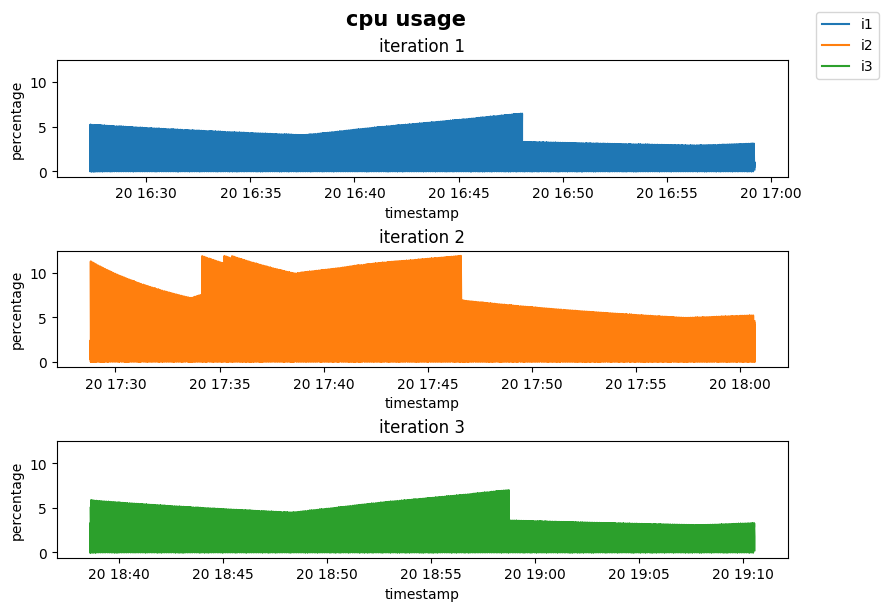

In [7]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

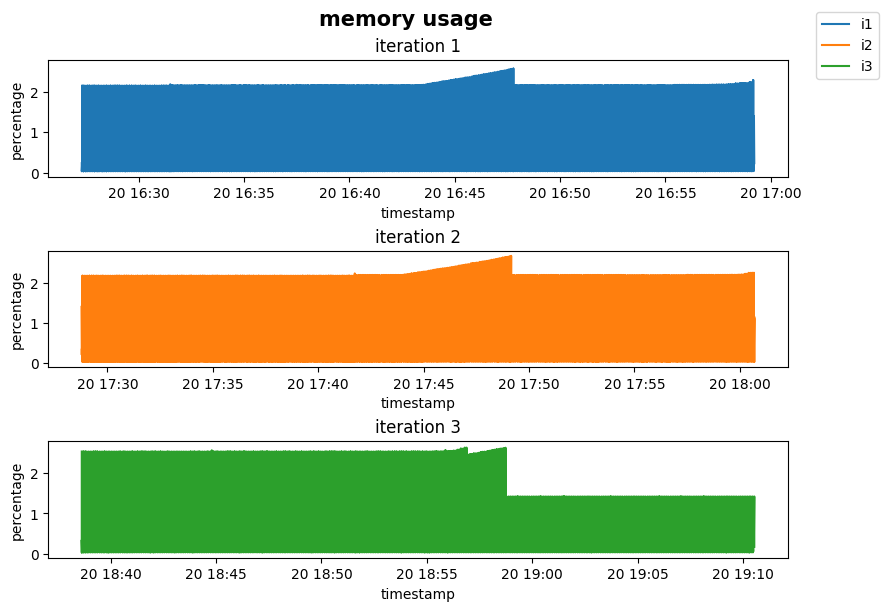

In [8]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

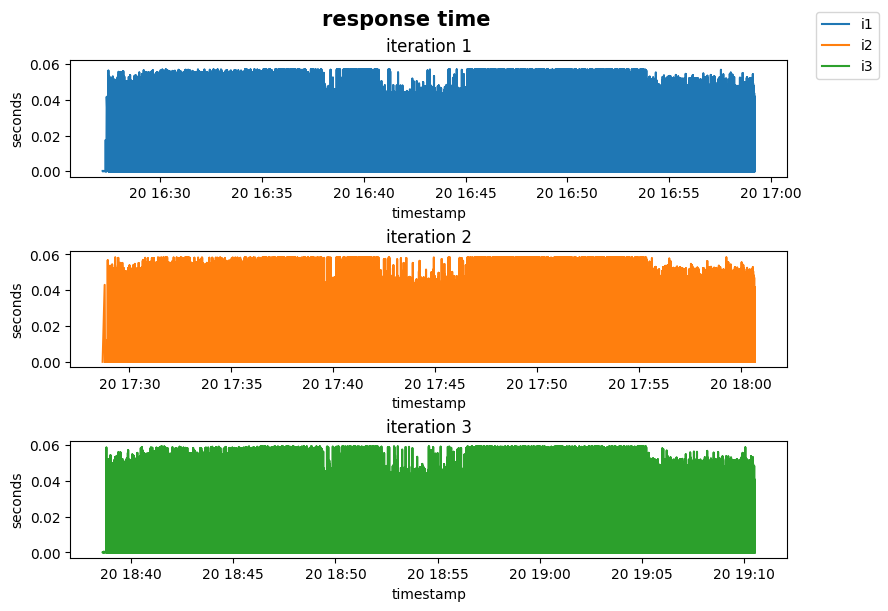

In [9]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

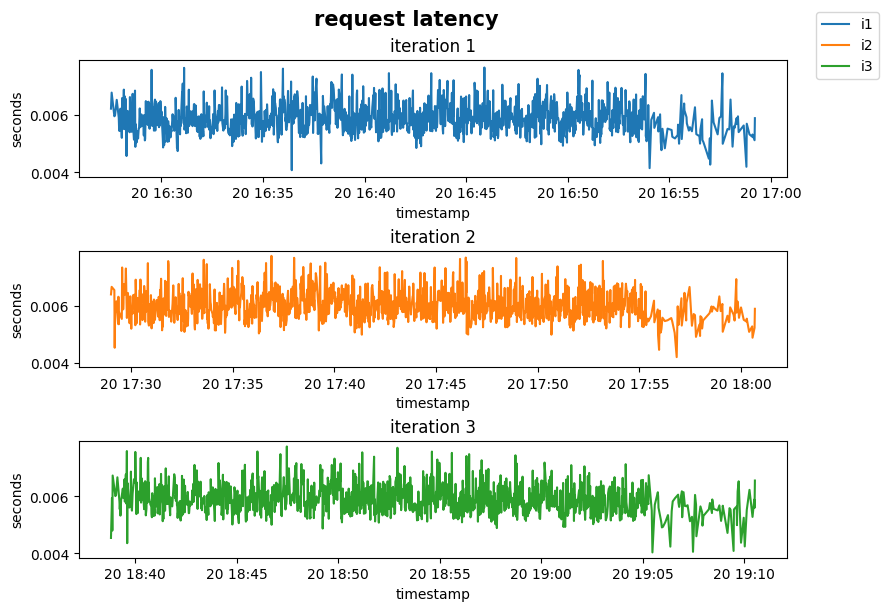

In [10]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

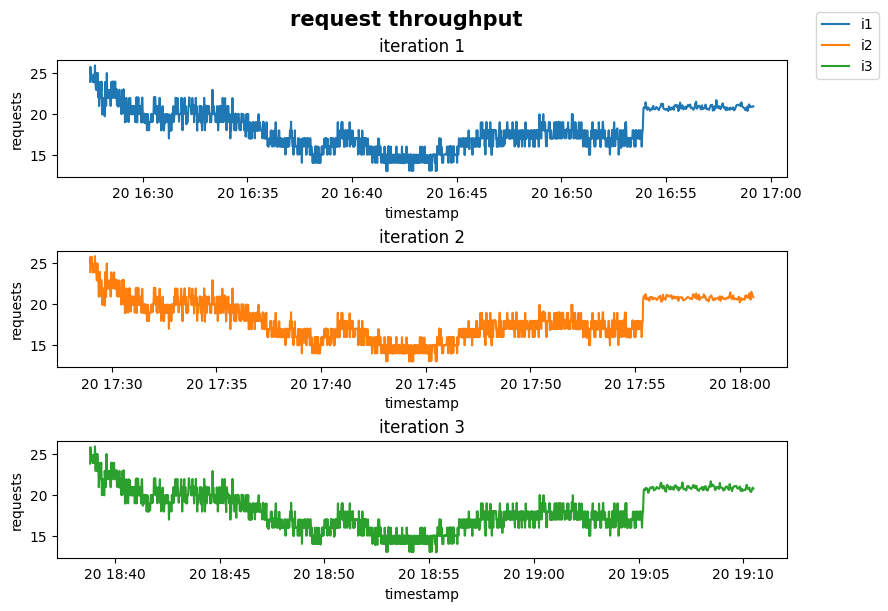

In [11]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig